# MANOJ KUMAR - 2048015

### Data Read

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

kidney_disease = pd.read_csv("kidney_disease.csv")

In [27]:
kidney_disease.head(12).T

,0,1,2,3,4,5,6,7,8,9,10,11
id,0,1,2,3,4,5,6,7,8,9,10,11
age,48,7,62,48,51,60,68,24,52,53,50,63
bp,80,50,80,70,80,90,70,NaN,100,90,60,70
sg,1.02,1.02,1.01,1.005,1.01,1.015,1.01,1.015,1.015,1.02,1.01,1.01
al,1,4,2,4,2,3,0,2,3,2,2,3
su,0,0,3,0,0,0,0,4,0,0,4,0
rbc,NaN,NaN,normal,normal,normal,NaN,NaN,normal,normal,abnormal,NaN,abnormal
pc,normal,normal,normal,abnormal,normal,NaN,normal,abnormal,abnormal,abnormal,abnormal,abnormal
pcc,notpresent,notpresent,notpresent,present,notpresent,notpresent,notpresent,notpresent,present,present,present,present
ba,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent


In [28]:
kidney_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

## EDA

In [29]:
# '?' character remove process in the dataset

for i in ['rc','wc','pcv']:
    kidney_disease[i] = kidney_disease[i].str.extract('(\d+)').astype(float)

In [30]:
kidney_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

In [40]:
kidney_disease['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [42]:
kidney_disease['classification'] = kidney_disease['classification'].replace(to_replace = 'ckd\t', value = 'ckd')

In [43]:
kidney_disease['classification'] = kidney_disease['classification'].replace(to_replace={'ckd':1,'notckd':0})
kidney_disease.rename(columns={'classification':'Target'},inplace=True)

kidney_disease.T

In [49]:
categorical_features = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [50]:
df = kidney_disease
df.drop(categorical_features, axis=1, inplace=True)

,0,1,2,3,4,5,6,7,8,9,10,11
id,0.00,1.00,2.00,3.000,4.00,5.000,6.00,7.000,8.000,9.00,10.00,11.00
age,48.00,7.00,62.00,48.000,51.00,60.000,68.00,24.000,52.000,53.00,50.00,63.00
bp,80.00,50.00,80.00,70.000,80.00,90.000,70.00,NaN,100.000,90.00,60.00,70.00
sg,1.02,1.02,1.01,1.005,1.01,1.015,1.01,1.015,1.015,1.02,1.01,1.01
al,1.00,4.00,2.00,4.000,2.00,3.000,0.00,2.000,3.000,2.00,2.00,3.00
su,0.00,0.00,3.00,0.000,0.00,0.000,0.00,4.000,0.000,0.00,4.00,0.00
bgr,121.00,NaN,423.00,117.000,106.00,74.000,100.00,410.000,138.000,70.00,490.00,380.00
bu,36.00,18.00,53.00,56.000,26.00,25.000,54.00,31.000,60.000,107.00,55.00,60.00
sc,1.20,0.80,1.80,3.800,1.40,1.100,24.00,1.100,1.900,7.20,4.00,2.70
sod,NaN,NaN,NaN,111.000,NaN,142.000,104.00,NaN,NaN,114.00,NaN,131.00


In [51]:
df.drop('id',axis=1,inplace=True)
df.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
age,48.00,7.00,62.00,48.000,51.00,60.000,68.00,24.000,52.000,53.00,50.00,63.00,68.000,68.0,68.00
bp,80.00,50.00,80.00,70.000,80.00,90.000,70.00,NaN,100.000,90.00,60.00,70.00,70.000,70.0,80.00
sg,1.02,1.02,1.01,1.005,1.01,1.015,1.01,1.015,1.015,1.02,1.01,1.01,1.015,NaN,1.01
al,1.00,4.00,2.00,4.000,2.00,3.000,0.00,2.000,3.000,2.00,2.00,3.00,3.000,NaN,3.00
su,0.00,0.00,3.00,0.000,0.00,0.000,0.00,4.000,0.000,0.00,4.00,0.00,1.000,NaN,2.00
bgr,121.00,NaN,423.00,117.000,106.00,74.000,100.00,410.000,138.000,70.00,490.00,380.00,208.000,98.0,157.00
bu,36.00,18.00,53.00,56.000,26.00,25.000,54.00,31.000,60.000,107.00,55.00,60.00,72.000,86.0,90.00
sc,1.20,0.80,1.80,3.800,1.40,1.100,24.00,1.100,1.900,7.20,4.00,2.70,2.100,4.6,4.10
sod,NaN,NaN,NaN,111.000,NaN,142.000,104.00,NaN,NaN,114.00,NaN,131.00,138.000,135.0,130.00
pot,NaN,NaN,NaN,2.500,NaN,3.200,4.00,NaN,NaN,3.70,NaN,4.20,5.800,3.4,6.40


#### Finding Missing Values: 
      When the data collected is real world data, and then it will contain missing values. This brings more change in the prediction accuracy. Sometimes these missing values can be simply deleted or ignored if they are not large in number. It is the simplest way to handle the missing data but it is not considered healthy for the model as the missing value can be an important attribute contributing to the disease. The missing values can also be replaced by zero this will not bring any change as whole, but this method cannot be much yielding. So an efficient way to handle missing values is to use mean, average of the observed attribute or value. This way we lead to more genuine data and better prediction results

In [52]:
df.isnull().sum().sort_values(ascending=False)

rc        131
wc        106
pot        88
sod        87
pcv        71
hemo       52
su         49
sg         47
al         46
bgr        44
bu         19
sc         17
bp         12
age         9
Target      0
dtype: int64

In [57]:
numerical_features = df.keys()
numerical_features

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc', 'Target'],
      dtype='object')

In [58]:
from sklearn.impute import SimpleImputer
miss_mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
miss_mean_imputer = miss_mean_imputer.fit(df)
dataset = miss_mean_imputer.transform(df.values)
dataset = pd.DataFrame(dataset, columns = numerical_features)
dataset

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,Target
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.000000,1.0
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.241636,1.0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.241636,1.0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.000000,1.0
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,47.0,6700.0,4.000000,0.0
396,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,54.0,7800.0,6.000000,0.0
397,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,49.0,6600.0,5.000000,0.0
398,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,51.0,7200.0,5.000000,0.0


In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(dataset)

StandardScaler()

In [61]:
scaled_data=scaler.transform(dataset)

In [62]:
scaled_data

array([[-0.20546364,  0.26233836,  0.48335471, ..., -0.24051868,
         0.85418167,  0.77459667],
       [-2.62380991, -1.96658024,  0.48335471, ..., -0.95478626,
         0.        ,  0.77459667],
       [ 0.62031314,  0.26233836, -1.38139079, ..., -0.35956327,
         0.        ,  0.77459667],
       ...,
       [-2.32888964,  0.26233836,  0.48335471, ..., -0.71669706,
         0.85418167, -1.29099445],
       [-2.03396936, -1.22360737,  1.41572747, ..., -0.47860787,
         0.85418167, -1.29099445],
       [ 0.38437691,  0.26233836,  1.41572747, ..., -0.637334  ,
         1.98052908, -1.29099445]])

In [63]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [64]:
x_pca=pca.transform(scaled_data)

In [65]:
scaled_data.shape

(400, 15)

In [66]:
x_pca.shape

(400, 2)

Text(0, 0.5, 'Second principle component')

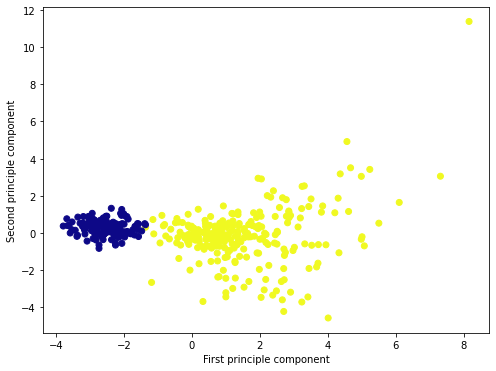

In [70]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=dataset['Target'], cmap='plasma')
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [71]:
pca.components_

array([[ 0.13713127,  0.15679798, -0.3004958 ,  0.30112831,  0.18301035,
         0.20373555,  0.28127461,  0.22803847, -0.21398542,  0.08924478,
        -0.36910895, -0.36875138,  0.10204668, -0.31617216,  0.36491611],
       [-0.15432866, -0.0673094 ,  0.16675852, -0.07835861, -0.45455146,
        -0.46166599,  0.31963265,  0.43056658, -0.32857766,  0.11355829,
        -0.07504958, -0.07047631, -0.2701949 , -0.10400664, -0.12295412]])

In [72]:
df_comp = pd.DataFrame(pca.components_,columns=numerical_features)

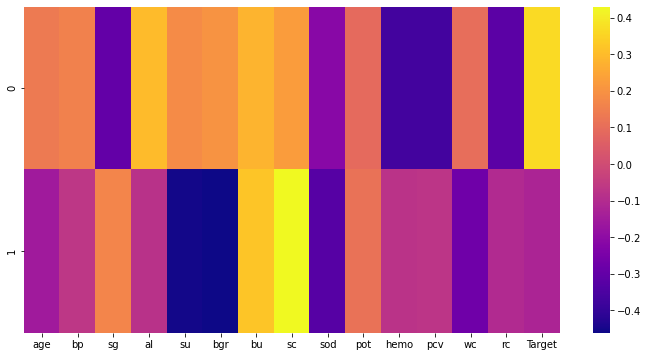

In [75]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.


In [79]:
pca.explained_variance_ratio_

array([0.35512469, 0.11024245])

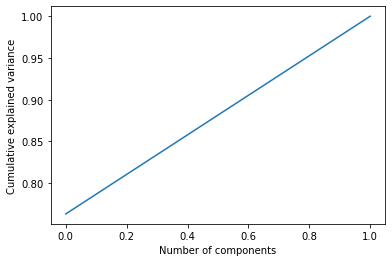

In [83]:
pca=PCA().fit(x_pca)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.show()